# Breast Cancer
### 2.1 Preparing the datasets

- Load data from wdbc.data file

In [30]:
from matplotlib import gridspec
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
breast_cancer_url = "./wdbc.data"

# Load and preprocess Breast Cancer dataset
bc_data = pd.read_csv(breast_cancer_url)
bc_columns = pd.read_csv(breast_cancer_url, nrows=1).columns
bc_data['Diagnosis'] = bc_data['Diagnosis'].map({'M': 1, 'B': 0})  # Binary mapping: Malignant (1), Benign (0)
bc_features = bc_data.iloc[:, 2:].values
bc_labels = bc_data['Diagnosis'].values

bc_data.head()


,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Shuffle and split data correspond to each propotion

In [31]:
# Function for stratified splits
def stratified_split(features, labels, train_size):
    return train_test_split(features, labels, train_size=train_size, stratify=labels, random_state=42)

# Splits
proportions = [0.4, 0.6, 0.8, 0.9]
splits = {}
for prop in proportions:
    feature_train, feature_test, label_train, label_test = stratified_split(bc_features, bc_labels, train_size=prop)
    splits[prop] = {
        "feature_train": feature_train,
        "feature_test": feature_test,
        "label_train": label_train,
        "label_test": label_test
    }

- Visualize the class distributions in all datasets (the original set, training sets, and test sets) across all proportions to demonstrate that they have been appropriately prepared.

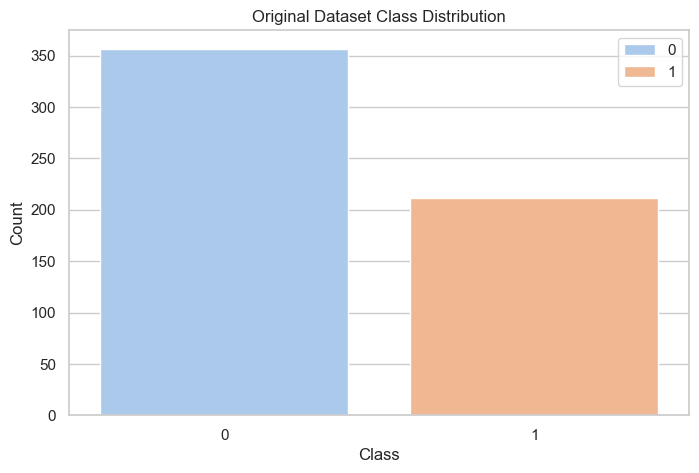

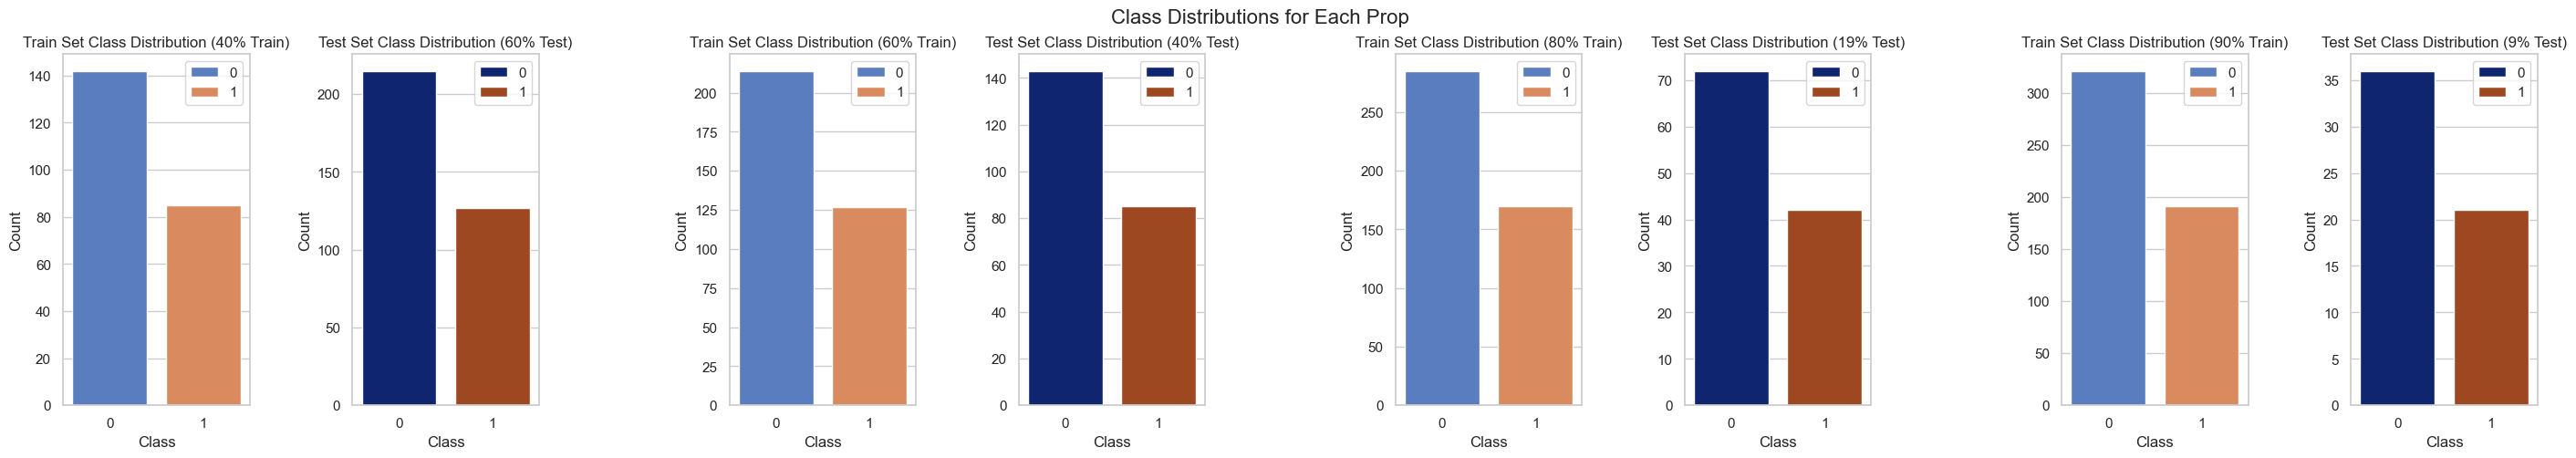

In [13]:
def visualize_class_distributions(data_dict, original_labels):
    sns.set_theme(style="whitegrid")
    
    # Original dataset
    plt.figure(figsize=(8, 5))
    sns.countplot(x=original_labels, palette="pastel", hue=original_labels)
    plt.title("Original Dataset Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()
    
    fig = plt.figure(figsize=(35, 5))
    fig.suptitle(f"Class Distributions for Each Prop", fontsize=16)
    outer_grid = gridspec.GridSpec(1, 4, wspace=0.4, hspace=0.3)

    for i, (prop, data) in enumerate(data_dict.items()):
        inner_grid = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer_grid[i], wspace=0.55, hspace=0.2)
        
        # Train set
        ax1 = plt.Subplot(fig, inner_grid[0])
        sns.countplot(x=data["label_train"], palette="muted", ax=ax1, hue=data["label_train"])
        ax1.set_title(f"Train Set Class Distribution ({int(prop*100)}% Train)")
        ax1.set_xlabel("Class")
        ax1.set_ylabel("Count")
        fig.add_subplot(ax1)
        
        # Test set
        ax2 = plt.Subplot(fig, inner_grid[1])
        sns.countplot(x=data["label_test"], palette="dark", ax=ax2, hue=data["label_test"])
        ax2.set_title(f"Test Set Class Distribution ({int((1-prop)*100)}% Test)")
        ax2.set_xlabel("Class")
        ax2.set_ylabel("Count")
        fig.add_subplot(ax2)
        
    plt.show()

visualize_class_distributions(splits, bc_labels)

# 2.2 Building the decision tree classifiers

Accuracy for 40% train and 60% test: 0.91
Accuracy for 60% train and 40% test: 0.94
Accuracy for 80% train and 20% test: 0.96
Accuracy for 90% train and 10% test: 0.95
Decision Tree for 40% train and 60% test:


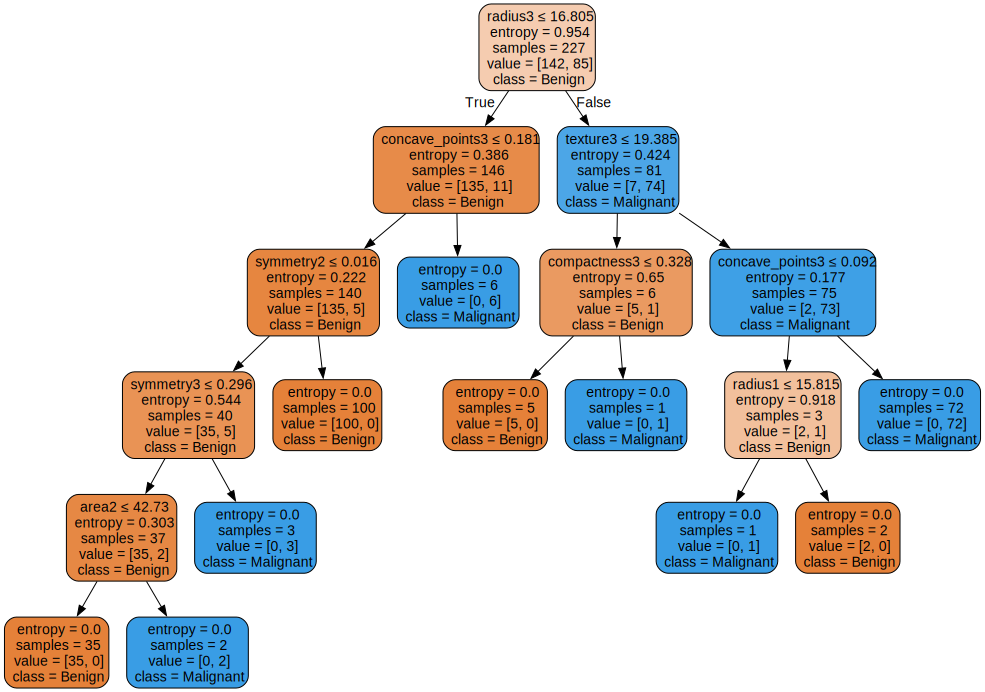

Decision Tree for 60% train and 40% test:


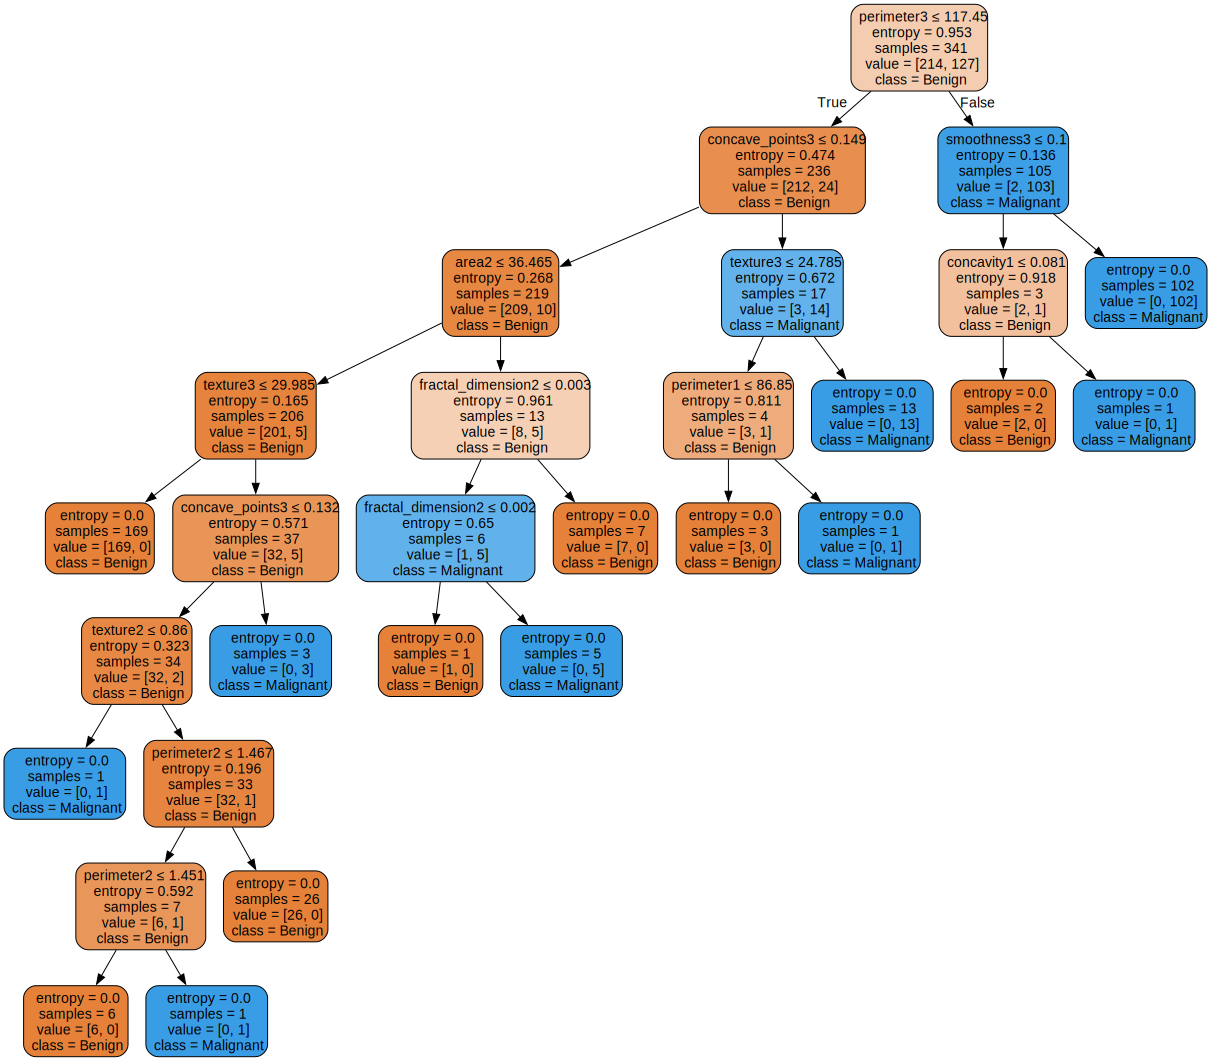

Decision Tree for 80% train and 20% test:


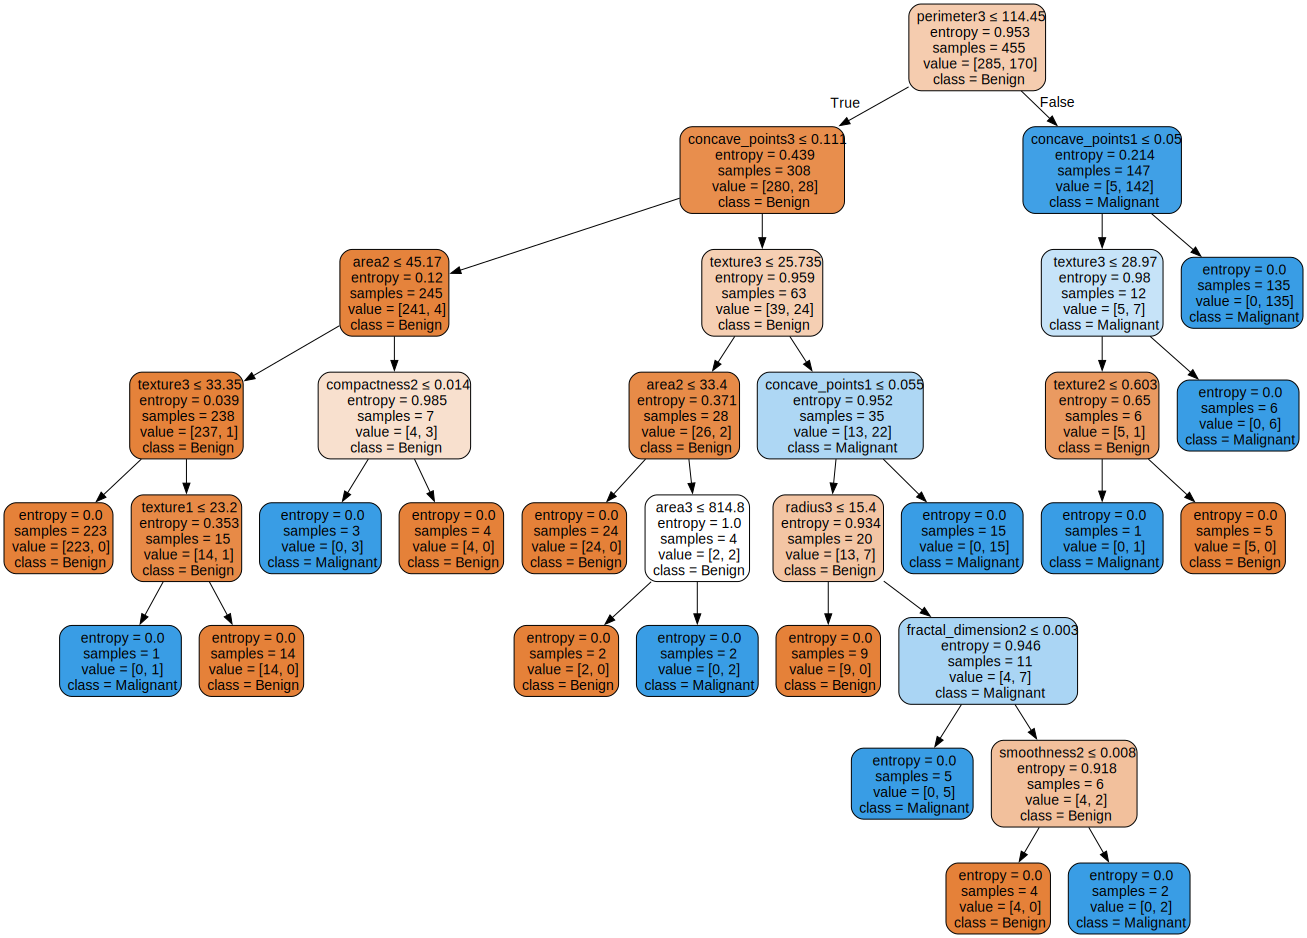

Decision Tree for 90% train and 10% test:


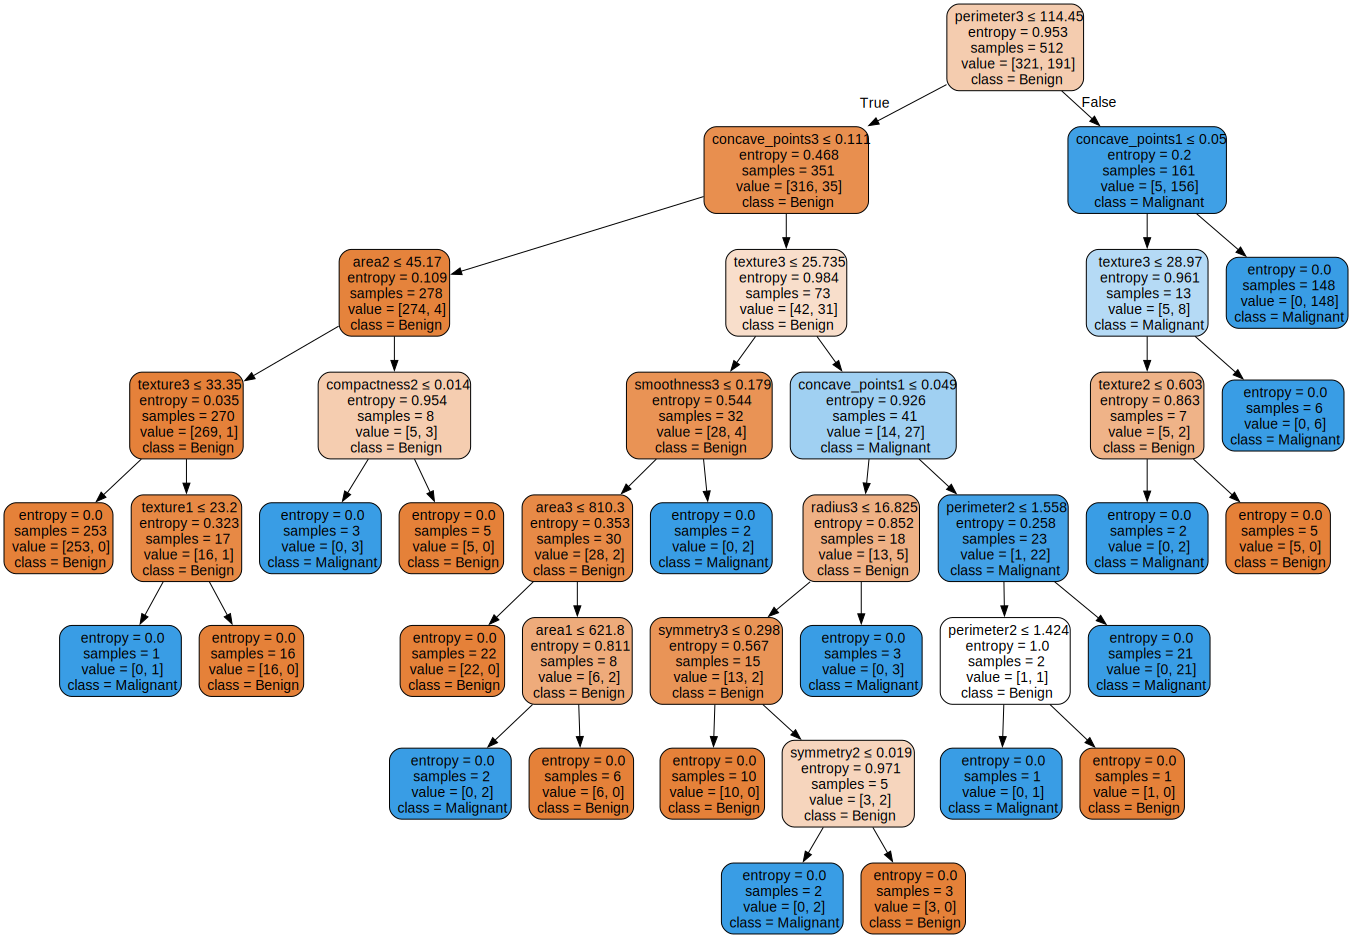

In [11]:
from math import ceil
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

models = {}
for prop, data in splits.items():
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(data['feature_train'], data['label_train'])
    models[prop] = {
        "model": clf,
        "feature_test": data['feature_test'],
        "label_test": data['label_test']
    }

for prop in models:
    feature_test = models[prop]['feature_test']
    label_test = models[prop]['label_test']
    model = models[prop]['model']
    accuracy = model.score(feature_test, label_test)
    print(f"Accuracy for {ceil(prop*100)}% train and {ceil((1-prop)*100)}% test: {accuracy:.2f}")

for prop, model_info in models.items():
    model = model_info['model']
    dot_data = export_graphviz(model, out_file=None, 
                                   feature_names=bc_columns[2:],  
                                   class_names=['Benign', 'Malignant'],  
                                   filled=True, rounded=True,  
                                   special_characters=True)
    graph = graphviz.Source(dot_data)
    print(f"Decision Tree for {ceil(prop*100)}% train and {ceil((1-prop)*100)}% test:")
    display(graph)

# 2.3 Evaluating the decision tree classifiers

Classification Report for 40% train and 60% test:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       215
           1       0.92      0.83      0.88       127

    accuracy                           0.91       342
   macro avg       0.91      0.90      0.90       342
weighted avg       0.91      0.91      0.91       342

Confusion Matrix:
[[206   9]
 [ 21 106]]


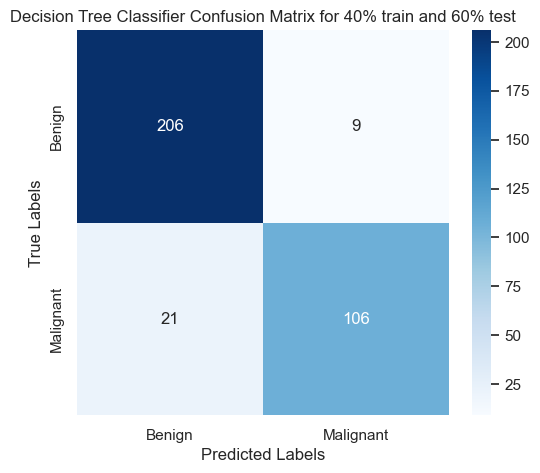

Classification Report for 60% train and 40% test:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       143
           1       0.93      0.91      0.92        85

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.93       228
weighted avg       0.94      0.94      0.94       228

Confusion Matrix:
[[137   6]
 [  8  77]]


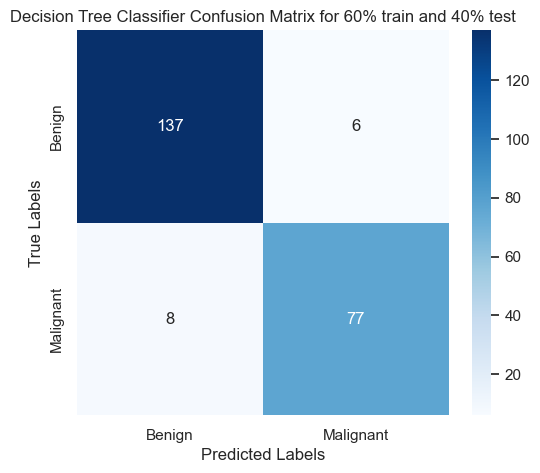

Classification Report for 80% train and 20% test:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[71  1]
 [ 4 38]]


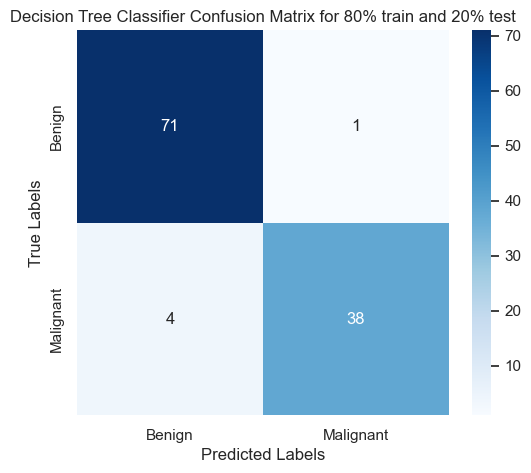

Classification Report for 90% train and 10% test:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.95      0.90      0.93        21

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57

Confusion Matrix:
[[35  1]
 [ 2 19]]


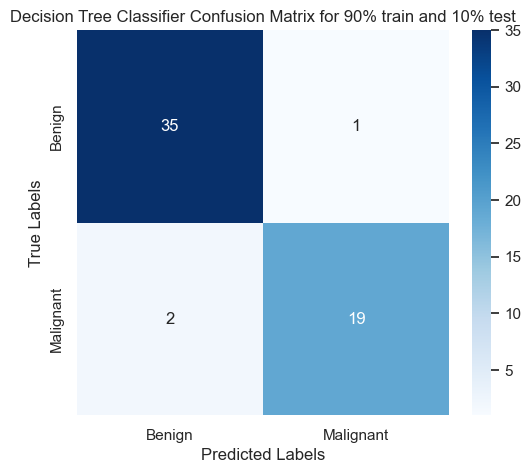

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

for prop, model_info in models.items():
    model = model_info['model']
    feature_test = model_info['feature_test']
    label_pred = model.predict(feature_test)

    # Classification Report
    print(f"Classification Report for {ceil(prop*100)}% train and {ceil((1-prop)*100)}% test:")
    print(classification_report(model_info['label_test'], label_pred))

    # Confusion Matrix
    cm = confusion_matrix(model_info['label_test'], label_pred)
    print("Confusion Matrix:")
    print(cm)

    class_names = ["Benign", "Malignant"]

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Decision Tree Classifier Confusion Matrix for {ceil(prop*100)}% train and {ceil((1-prop)*100)}% test')
    plt.show()


# 2.4 The depth and accuracy of a decision tree

###  Provide the decision trees, visualized using Graphviz, for each max_depth value.

Accuracy for max_depth=None: 0.96
Decision Tree for max_depth=None:


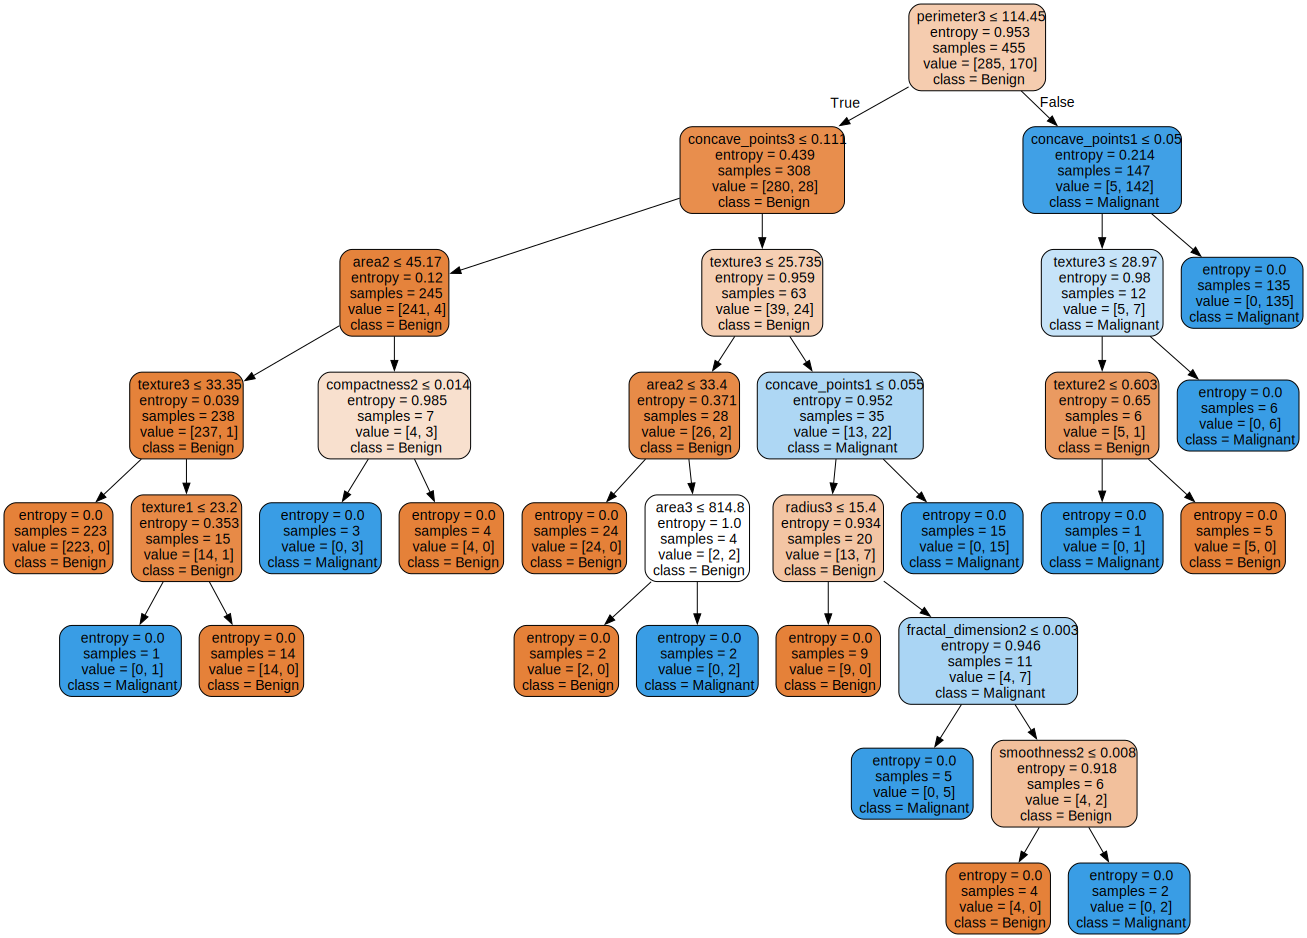

Accuracy for max_depth=2: 0.89
Decision Tree for max_depth=2:


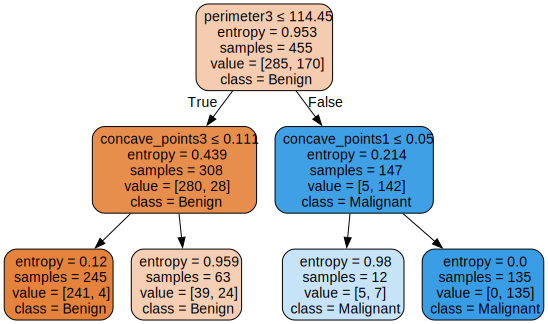

Accuracy for max_depth=3: 0.94
Decision Tree for max_depth=3:


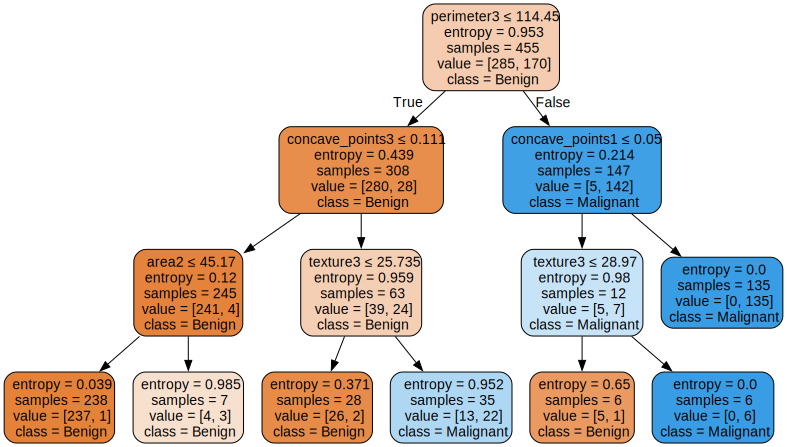

Accuracy for max_depth=4: 0.93
Decision Tree for max_depth=4:


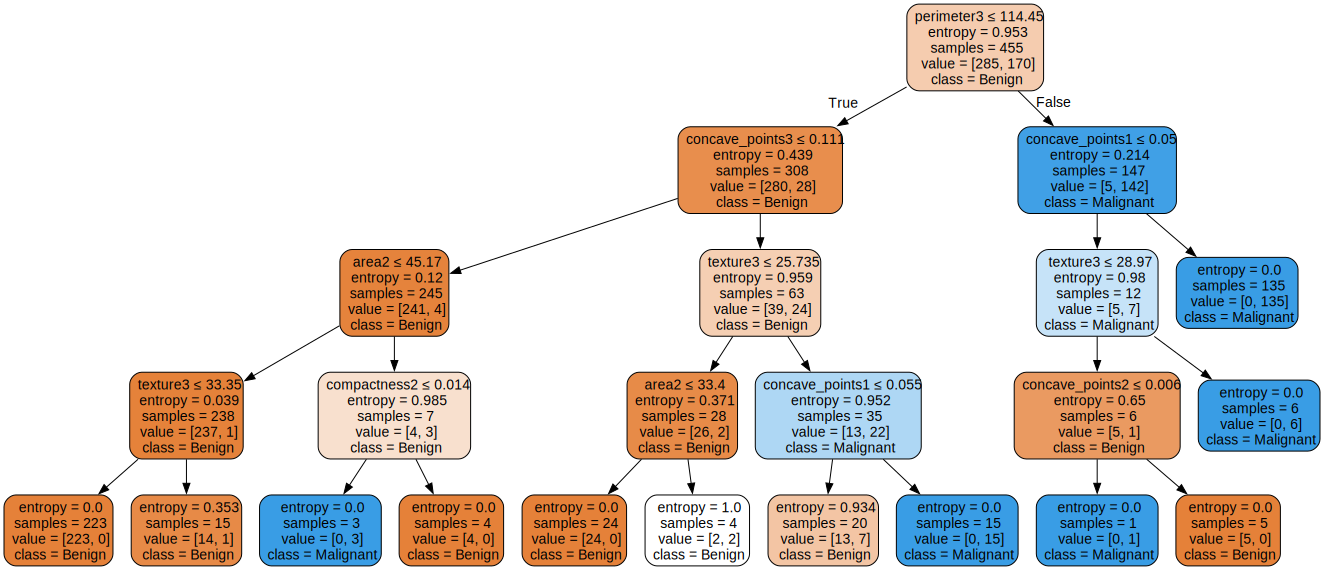

Accuracy for max_depth=5: 0.96
Decision Tree for max_depth=5:


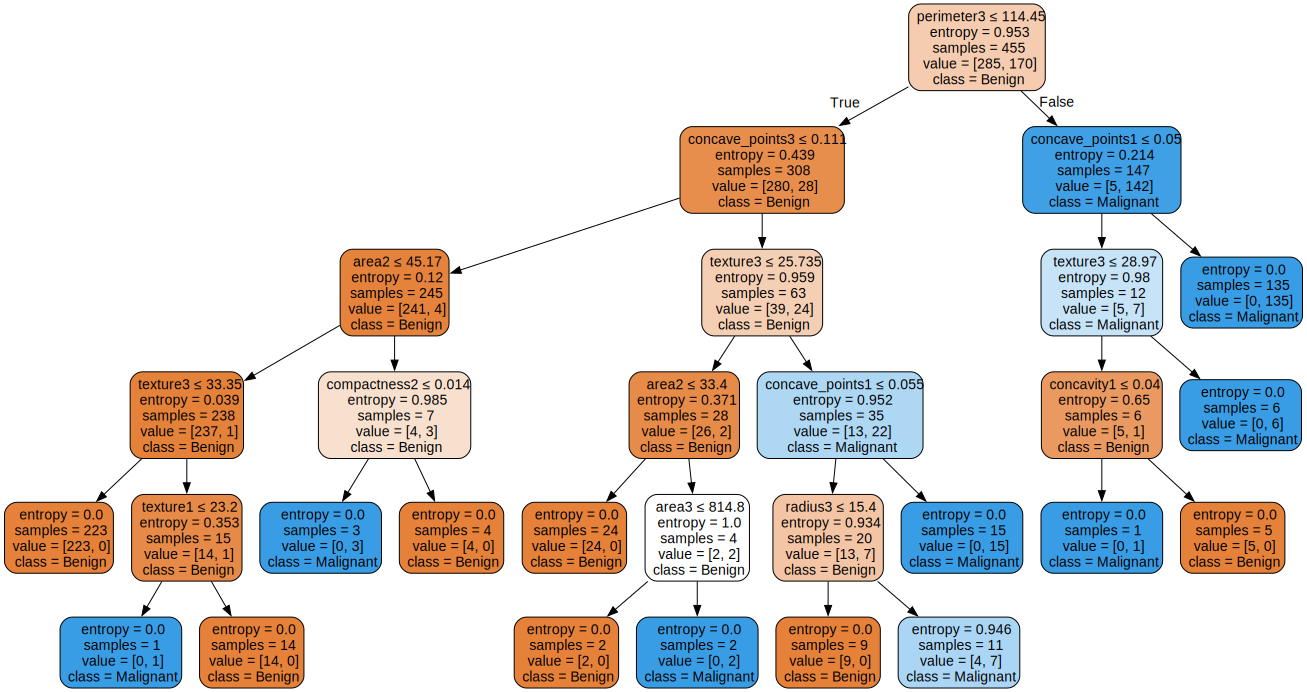

Accuracy for max_depth=6: 0.93
Decision Tree for max_depth=6:


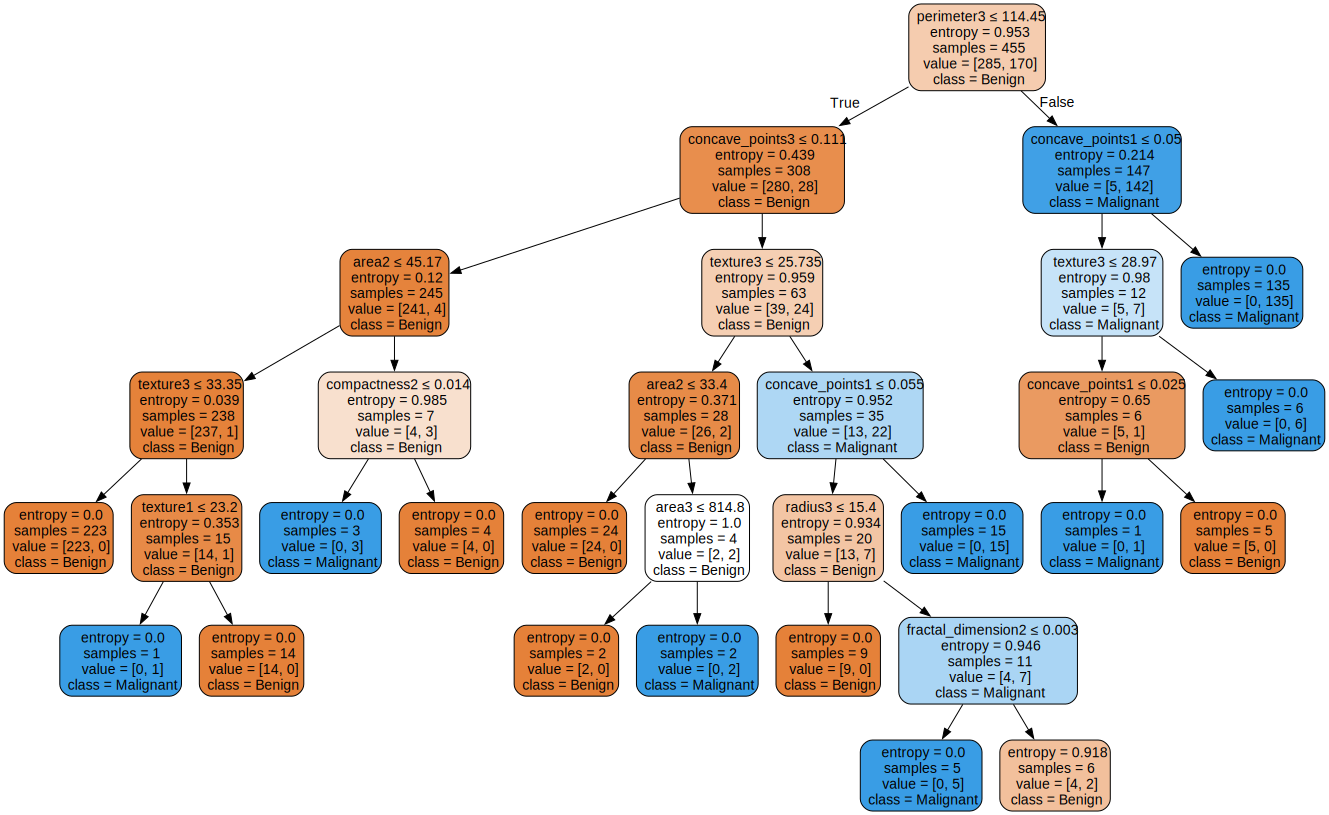

Accuracy for max_depth=7: 0.96
Decision Tree for max_depth=7:


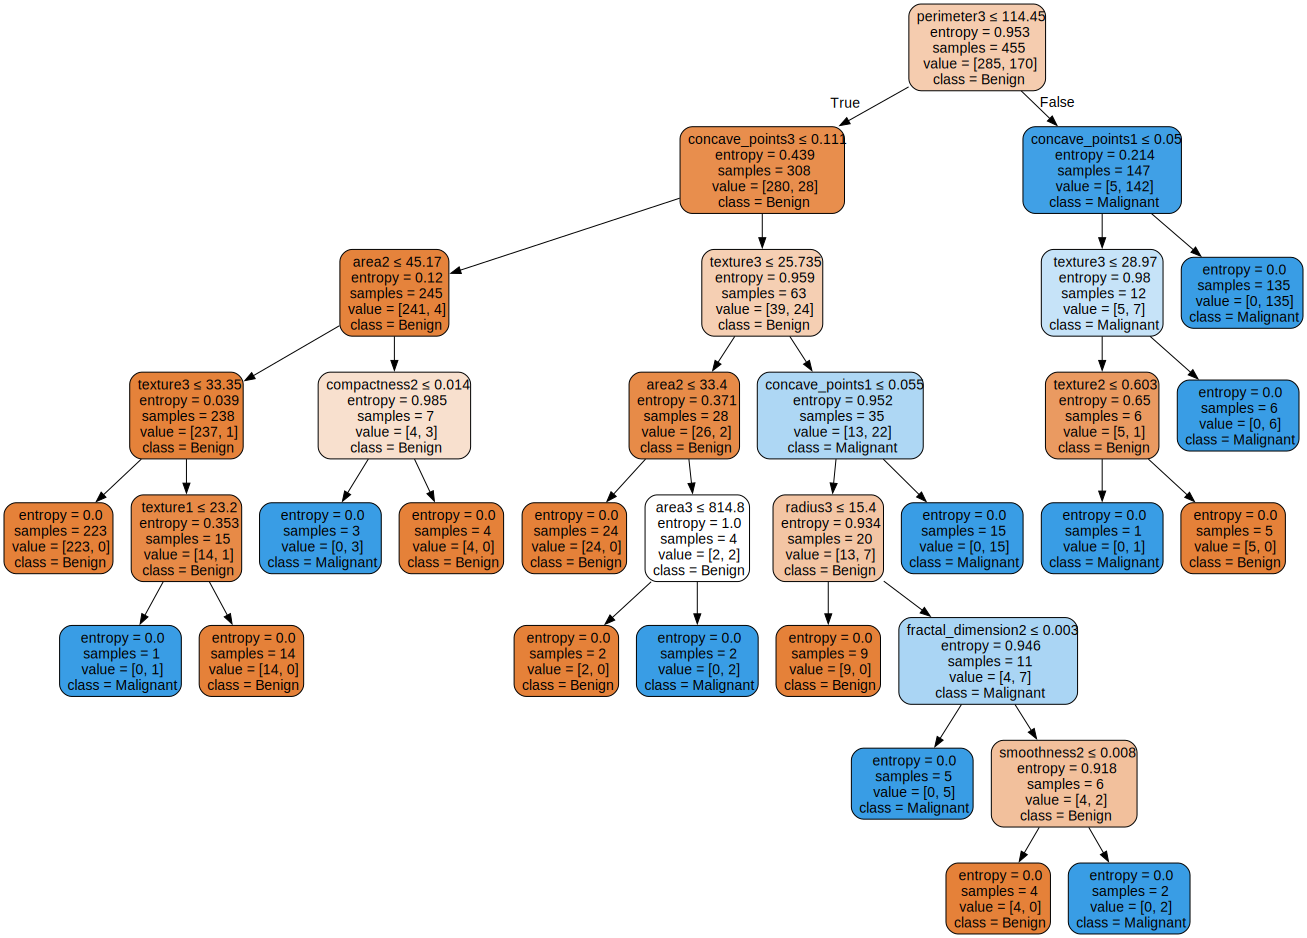

In [22]:
split_80_20 = splits[0.8]
feature_train = split_80_20['feature_train']
label_train = split_80_20['label_train']
feature_test = split_80_20['feature_test']
label_test = split_80_20['label_test']

def create_report_table(data):
    original = {
        "Max_depth": ["Accuracy"],
    }
    for depth in data:
        original[depth] = [data[depth]]
    return pd.DataFrame(original)

max_depths = [None, 2,3,4,5,6,7]
accuracy_score = {}
for depth in max_depths:
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=depth)
    clf.fit(feature_train, label_train)
    accuracy = clf.score(feature_test, label_test)
    print(f"Accuracy for max_depth={depth}: {accuracy:.2f}")
    accuracy_score[depth] = accuracy
    # Decision tree
    dot_data = export_graphviz(clf, out_file=None, 
                                   feature_names=bc_columns[2:],  
                                   class_names=['Benign', 'Malignant'],  
                                   filled=True, rounded=True,  
                                   special_characters=True)
    graph = graphviz.Source(dot_data)
    print(f"Decision Tree for max_depth={depth}:")
    display(graph)


### Report the accuracy_score (on the test set) of the decision tree classifier for each value of the max_depth parameter in the following table

In [23]:
# Accuracy score report in table
print("Accuracy Report:")
display(create_report_table(accuracy_score).style.hide(axis='index'))

Accuracy Report:


Max_depth,None,2,3,4,5,6,7
Accuracy,0.956140,0.885965,0.938596,0.929825,0.956140,0.929825,0.956140


### Provide charts and your insights on the statistics reported above.

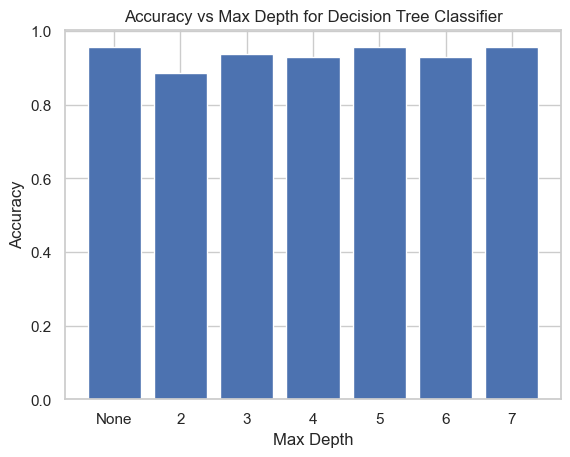

In [ ]:

plt.bar([str(key) for key in accuracy_score.keys()], list(accuracy_score.values()))
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Decision Tree Classifier')
plt.show()